In [4]:
# Imports required tensorflow
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Uploads the dataset from excel
from google.colab import files
uploaded = files.upload()

Saving Training and Testing data.xlsx to Training and Testing data.xlsx


In [6]:
# Reads the dataset
SkinData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Skin')
FatData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Subcutaneous fat')
MuscleData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Muscle')

In [7]:
SkinData.head()

,Skin mean thickness (mm),Skin cutting force (N)
0,1.71,53.08
1,1.72,53.04
2,1.72,53.22
3,1.73,53.21
4,1.74,53.15


In [8]:
FatData.head()

,Fat mean thickness (mm),Subcutaneous fat cutting force (N)
0,19.05,1.80
1,19.15,1.81
2,19.17,1.83
3,19.18,1.84
4,19.25,1.86


In [9]:
 MuscleData.head()

,Muscle mean thickness (mm),Muscle cutting force (N)
0,39.05,38.97
1,39.08,39.01
2,39.15,39.08
3,39.23,39.05
4,39.32,39.12


### Creating the data of the three tissue layers to view and fit

In [10]:
# Here we create the x & y variables for SkinData
x1 = SkinData.drop("Skin cutting force (N)", axis = 1)
y1 = SkinData["Skin cutting force (N)"]

In [11]:
# Here we create the x & y variables for FatData
x2 = FatData.drop("Subcutaneous fat cutting force (N)", axis = 1)
y2 = FatData["Subcutaneous fat cutting force (N)"]

In [12]:
# Here we create the x & y variables for MuscleData
x3 = MuscleData.drop("Muscle cutting force (N)", axis = 1)
y3 = MuscleData["Muscle cutting force (N)"]

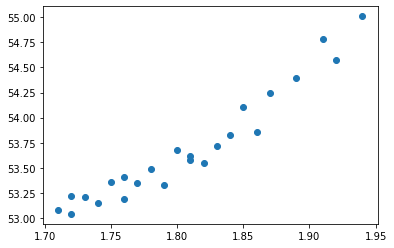

In [13]:
plt.scatter(x1, y1);

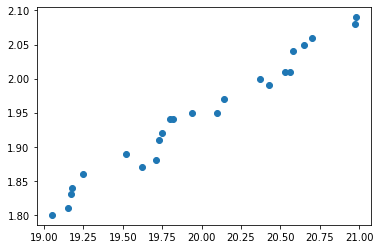

In [14]:
plt.scatter (x2, y2);

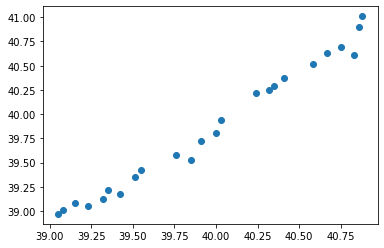

In [15]:
plt.scatter (x3, y3);

In [16]:
# Here, for SkinData, we create the training and test sets with a 80:20 split.
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)
len(x1), len(x1_train), len(x1_test)

(24, 19, 5)

In [17]:
# Here, for FatData, we create the training and test sets with a 80:20 split.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [18]:
# Here, for MuscleData, we create the training and test sets with a 80:20 split.
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 42)

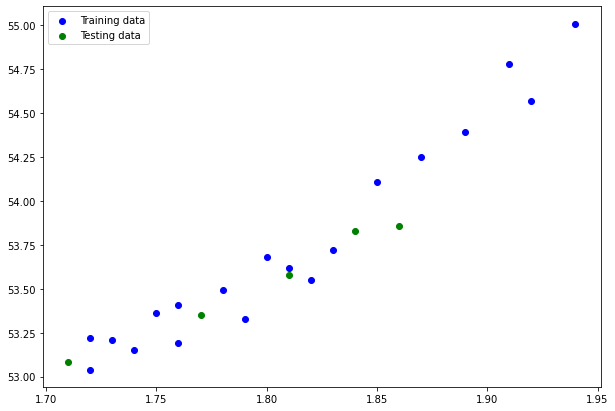

In [19]:
# Visualizing the training and testing Skindata
plt.figure(figsize =(10, 7))

# Training daa in BLUE
plt.scatter(x1_train, y1_train, c = 'b', label = "Training data")

# Testing data in GREEN
plt.scatter(x1_test, y1_test, c = 'g', label = "Testing data")

# Legend
plt.legend();

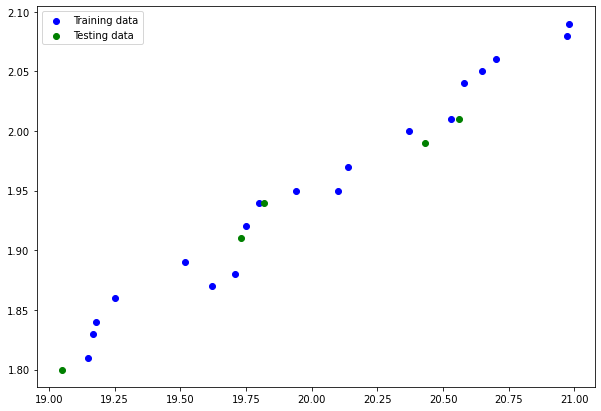

In [20]:
# Visualizing the training and testing Fatdata
plt.figure(figsize =(10, 7))

# Training daa in BLUE
plt.scatter(x2_train, y2_train, c = 'b', label = "Training data")

# Testing data in GREEN
plt.scatter(x2_test, y2_test, c = 'g', label = "Testing data")

# Legend
plt.legend();

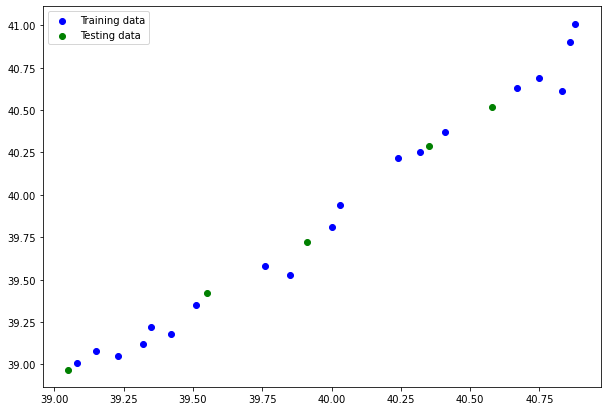

In [21]:
# Visualizing the training and testing Muscledata
plt.figure(figsize =(10, 7))

# Training daa in BLUE
plt.scatter(x3_train, y3_train, c = 'b', label = "Training data")

# Testing data in GREEN
plt.scatter(x3_test, y3_test, c = 'g', label = "Testing data")

# Legend
plt.legend();

### TEST model

* 1 layer, epochs = 100, SGD optimizer

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
SkinData_model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
History = SkinData_model.fit(x1_train, y1_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 639ms/step - loss: 52.7092 - mae: 52.7092
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 52.6665 - mae: 52.6665
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 52.6237 - mae: 52.6237
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 52.5810 - mae: 52.5810
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 52.5382 - mae: 52.5382
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 52.4954 - mae: 52.4954
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 52.4527 - mae: 52.4527
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 52.4099 - mae: 52.4099
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 52.3672 - mae: 52.3672
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 52.3244 - mae: 52.3244
Epoch 11/100
1/1 [==============================] - 0s 4

In [23]:
# Checking the parameters of the model
SkinData_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


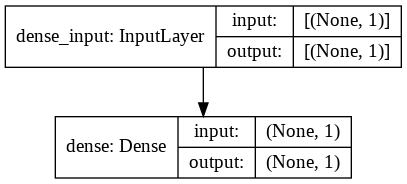

In [24]:
# Visualizing the hidden layers
from tensorflow.keras.utils import plot_model

plot_model(model = SkinData_model, show_shapes=True)

In [25]:
# Predictions
y_pred = SkinData_model.predict(x1_test)
y_pred

array([[5.2127094],
       [5.379314 ],
       [5.0699058],
       [5.426915 ],
       [5.307912 ]], dtype=float32)

In [26]:
# Creating a plotting function
def plot_predictions(train_data = x1_train,
                     train_labels = y1_train,
                     test_data = x1_test,
                     test_labels = y1_test,
                     predictions = y_pred):

 # Let's plot the train and test data, and compare the predictions to the ground truth labels
 plt.figure(figsize=(10,7))
 # Plot training data in BLUE
 plt.scatter(train_data, train_labels, c ='b', label = 'Training data')
 # Plot testing data in GREEN
 plt.scatter(test_data, test_labels, c = "g", label = 'Testing data')
 # Plot model's predictions in RED
 plt.scatter(test_data, predictions, c = "r", label = 'Predictions') 
 # Show the legend
 plt.legend();

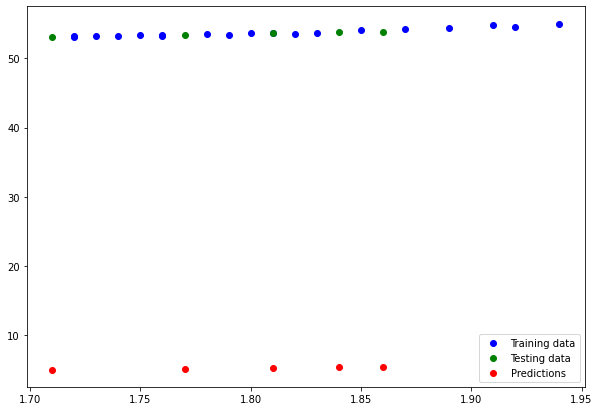

In [27]:
plot_predictions(train_data = x1_train,
                     train_labels = y1_train,
                     test_data = x1_test,
                     test_labels = y1_test,
                     predictions = y_pred)

* As seen from the prediction graph of the test model, the accuracy is very poor and the evaluation metrics below confirms this result.

### Evaluating our TEST model performance


In [28]:
# Let's evaluate the model on the test set
SkinData_model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 125ms/step - loss: 48.2607 - mae: 48.2607


[48.26065444946289, 48.26065444946289]

In [29]:
tf.constant(y_pred)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[5.2127094],
       [5.379314 ],
       [5.0699058],
       [5.426915 ],
       [5.307912 ]], dtype=float32)>

In [30]:
# Let's calculate the MAE after matching the shape of y1_test to y_pred (squeeze)
mae = tf.metrics.mean_absolute_error(y_true = y1_test, 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=48.260654>

In [31]:
# Let's calculate the MSE (for when larger errors are more significant than smaller errors)
mse = tf.metrics.mean_squared_error(y_true = y1_test, 
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2329.1191>

In [32]:
# Making functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

**Note** on TEST SkinData_model:
* The model is performing slightly better on the TEST dataset compared to the TRAINING dataset (evaluation).

* The model is on average off by 48.3827.

## Let's train and test our SkinData

### SkinData_model_1

* 2 layers, epochs = 100, SGD optimizer

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_1.fit(x1_train, y1_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 53.0687 - mae: 53.0687
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 52.9392 - mae: 52.9392
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 52.8085 - mae: 52.8085
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 52.6764 - mae: 52.6764
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 52.5426 - mae: 52.5426
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 52.4069 - mae: 52.4069
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 52.2691 - mae: 52.2691
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 52.1290 - mae: 52.1290
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 51.9864 - mae: 51.9864
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 51.8410 - mae: 51.8410
Epoch 11/100
1/1 [==============================] - 0s 6

In [34]:
# Check the results of the model on the test dataset
SkinData_model_1.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 106ms/step - loss: 0.8198 - mae: 0.8198


[0.8197898864746094, 0.8197898864746094]

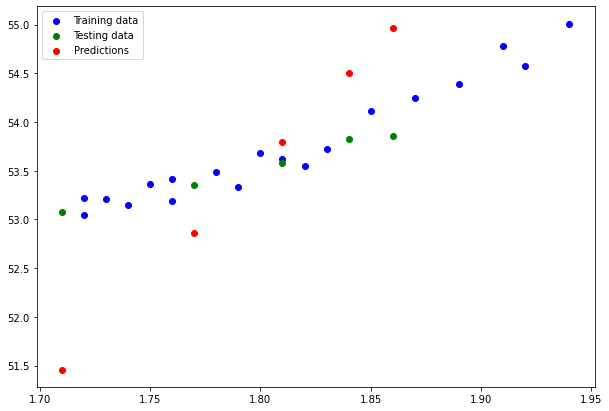

In [35]:
# Let's visualize model_1 by making a plot of its prediction
y1_pred = SkinData_model_1.predict(x1_test)
plot_predictions(predictions = y1_pred)

In [36]:
tf.constant(y1_pred)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[52.861675],
       [54.49787 ],
       [51.45922 ],
       [54.96535 ],
       [53.796642]], dtype=float32)>

In [37]:
tf.squeeze(y1_pred)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([52.861675, 54.49787 , 51.45922 , 54.96535 , 53.796642],
      dtype=float32)>

In [38]:
# model_1 evaluation metrics
mae_1 = mae(y1_test, y1_pred)
mse_1 = mse(y1_test, y1_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8197929>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9160346>)

Note on model_1:
* Again, the model is performing better on the TEST dataset than the TRAINING dataset (evaluation)

* The model is on average off by 0.7087

### SkinData model_2

* 3 layers (extra 100 hidden units), epochs = 100, SGD optimzier

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_2.fit(x1_train, y1_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 330ms/step - loss: 52.8372 - mae: 52.8372
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 52.5449 - mae: 52.5449
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 52.2427 - mae: 52.2427
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 51.9278 - mae: 51.9278
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 51.5970 - mae: 51.5970
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 51.2473 - mae: 51.2473
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 50.8748 - mae: 50.8748
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 50.4755 - mae: 50.4755
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 50.0448 - mae: 50.0448
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 49.5774 - mae: 49.5774
Epoch 11/100
1/1 [==============================] - 0s 7m

In [40]:
# Check the results of the larger model on the test dataset
SkinData_model_2.evaluate(x1_test, y1_test) 

1/1 [==============================] - 0s 100ms/step - loss: 3.3493 - mae: 3.3493


[3.3492774963378906, 3.3492774963378906]

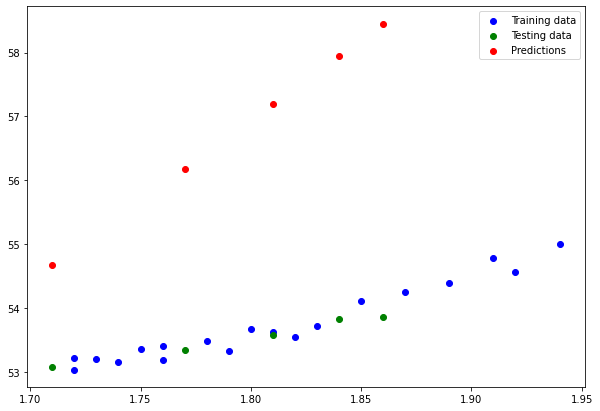

In [41]:
# Let's visualize model_2 by making a plot of its prediction
y2_pred = SkinData_model_2.predict(x1_test)
plot_predictions(predictions=y2_pred)

In [42]:
# model_2 evaluation metrics
mae_2 = mae(y1_test, y2_pred)
mse_2 = mse(y1_test, y2_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.3492782>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.3310795>)

**Note on model_3:**
* The model is performing much better on the TEST dataset than the TRAINING dataset.

* The model is on average off by 1.2515.

* However, compared to the previous models, the extra 100 hidden layers has decreased the effectiveness of the model (possibly too complex).

### SkinData model_3

* 2 layers, Adam optimizer (lr = 0.04), epochs = 100

In [43]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_3.fit(x1_train, y1_train, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 360ms/step - loss: 53.0687 - mae: 53.0687
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 52.3748 - mae: 52.3748
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 51.6468 - mae: 51.6468
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 50.8812 - mae: 50.8812
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 50.0701 - mae: 50.0701
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 49.2044 - mae: 49.2044
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 48.2765 - mae: 48.2765
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 47.2788 - mae: 47.2788
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 46.2048 - mae: 46.2048
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 45.0489 - mae: 45.0489
Epoch 11/100
1/1 [==============================] - 0s 

In [44]:
# Let's check the results of the smaller model on the test dataset
SkinData_model_3.evaluate(x1_test, y1_test) 

1/1 [==============================] - 0s 86ms/step - loss: 0.6535 - mae: 0.6535


[0.6535438299179077, 0.6535438299179077]

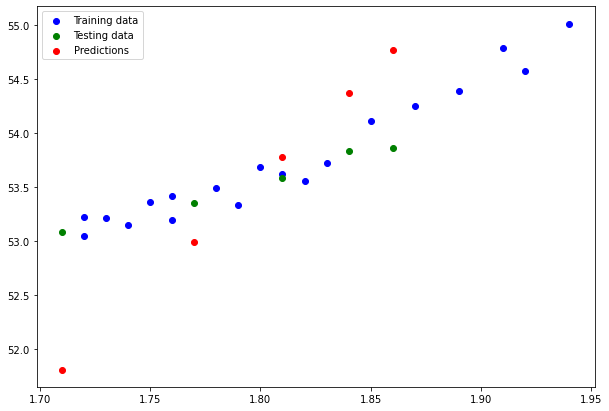

In [45]:
# Let's visualize model_1 by making a plot of its prediction
y3_pred = SkinData_model_3.predict(x1_test)
plot_predictions(predictions=y3_pred)

Text(0.5, 0, 'epochs')

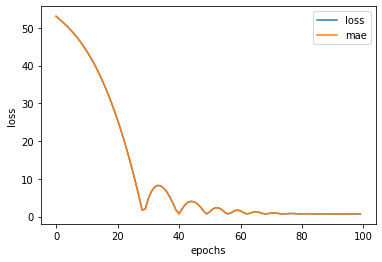

In [46]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [47]:
# model_3 evaluation metrics
mae_3 = mae(y1_test, y3_pred)
mse_3 = mse(y1_test, y3_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.6535431>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5772508>)

**Note on model_3:**
* The decrease in complexity of the model lead to a decrease in loss/mae.

* The implementation of the Adam optimizer at a lr = 0.04 enhanced the models effectiveness.

* Compared to model_1 (loss: 0.8198 - mae: 0.8198), model_3 showed a 25% decrease in loss and mae.

### SkinData model_4

* 2 layers, Adam optimizer (lr = 0.04), epochs = 600

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_4.fit(x1_train, y1_train, epochs = 600)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/600
1/1 [==============================] - 0s 356ms/step - loss: 53.0687 - mae: 53.0687
Epoch 2/600
1/1 [==============================] - 0s 6ms/step - loss: 52.3748 - mae: 52.3748
Epoch 3/600
1/1 [==============================] - 0s 4ms/step - loss: 51.6468 - mae: 51.6468
Epoch 4/600
1/1 [==============================] - 0s 4ms/step - loss: 50.8812 - mae: 50.8812
Epoch 5/600
1/1 [==============================] - 0s 4ms/step - loss: 50.0701 - mae: 50.0701
Epoch 6/600
1/1 [==============================] - 0s 6ms/step - loss: 49.2044 - mae: 49.2044
Epoch 7/600
1/1 [==============================] - 0s 7ms/step - loss: 48.2765 - mae: 48.2765
Epoch 8/600
1/1 [==============================] - 0s 7ms/step - loss: 47.2788 - mae: 47.2788
Epoch 9/600
1/1 [==============================] - 0s 6ms/step - loss: 46.2048 - mae: 46.2048
Epoch 10/600
1/1 [==============================] - 0s 8ms/step - loss: 45.0489 - mae: 45.0489
Epoch 11/600
1/1 [==============================] - 0s 4m

In [49]:
# Let's check the results of the model on the test dataset
SkinData_model_4.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 90ms/step - loss: 0.2965 - mae: 0.2965


[0.2964614927768707, 0.2964614927768707]

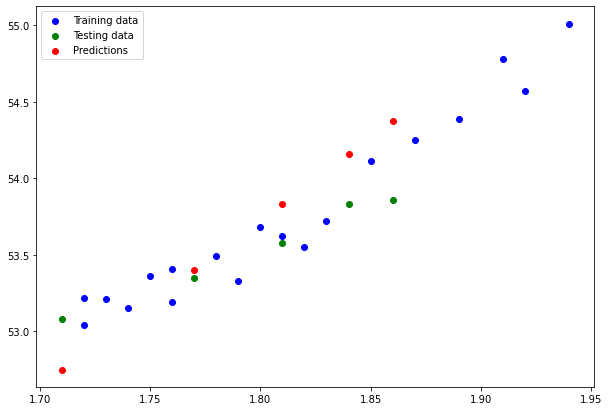

In [50]:
# Let's visualize model_1 by making a plot of its prediction
y4_pred = SkinData_model_4.predict(x1_test)
plot_predictions(predictions=y4_pred)

Text(0.5, 0, 'epochs')

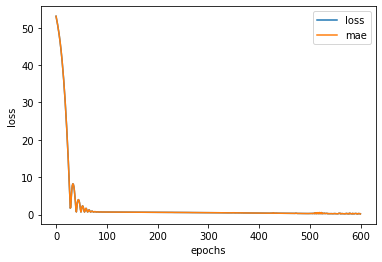

In [51]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [52]:
# model_4 evaluation metrics
mae_4 = mae(y1_test, y4_pred)
mse_4 = mse(y1_test, y4_pred)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.29646224>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.110430524>)

**Note on model_4:**

* The higher epochs led to a decrease in loss.

### SkinData model_5

* 2 layers, Adam optimizer (lr = 0.018), epochs = 2000, patience = 42

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_5 = tf.keras.Sequential([                                                                              
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = SkinData_model_5.fit(x1_train, y1_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 0s 338ms/step - loss: 53.0687 - mae: 53.0687
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 52.7609 - mae: 52.7609
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 52.4459 - mae: 52.4459
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 52.1236 - mae: 52.1236
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 51.7936 - mae: 51.7936
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 51.4555 - mae: 51.4555
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 51.1083 - mae: 51.1083
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 50.7510 - mae: 50.7510
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 50.3822 - mae: 50.3822
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 50.0008 - mae: 50.0008
Epoch 11/2000
1/1 [===========================

In [54]:
# Let's check the results of the model on the test dataset
SkinData_model_5.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 290ms/step - loss: 0.1084 - mae: 0.1084


[0.10839691013097763, 0.10839691013097763]

In [55]:
# Trial and error of different lr and patience settings:

# lr = 0.018, loss: 0.1977 (patience = 40, epochs = 1436)
# lr = 0.02, loss = 0.1312 (patience = 42)


# The lr of 0.018 showed the most optimal result

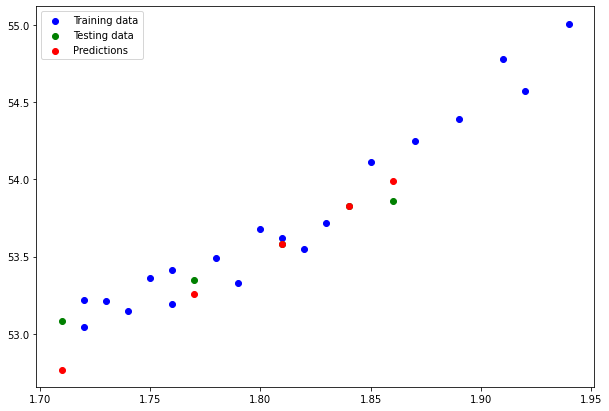

In [56]:
# Let's visualize model_1 by making a plot of its prediction
y5_pred = SkinData_model_5.predict(x1_test)
plot_predictions(predictions=y5_pred)

Text(0.5, 0, 'epochs')

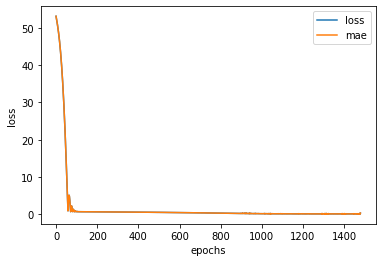

In [57]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [58]:
# model_5 evaluation metrics
mae_5 = mae(y1_test, y5_pred)
mse_5 = mse(y1_test, y5_pred)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.10839615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.024705213>)

**Note on model_5:**

* The increase in epochs lead to a decrease in the model's loss. However, the EarlyStopping callback component was added, which improved the model's prediction (reduced loss when compared to the test data) as it stopped training once the desired metric stopped improving.


# SkinData model_6

* 2 layers, Adam optimizer (lr = 0.008), epochs = 3000, activation = "relu"

In [59]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_6 = tf.keras.Sequential([    
  tf.keras.layers.Dense(10, activation="relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 30)
history = SkinData_model_6.fit(x1_train, y1_train, epochs = 3000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 0.6850 - mae: 0.6850
Epoch 270/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6850 - mae: 0.6850
Epoch 271/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.6849 - mae: 0.6849
Epoch 272/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.6847 - mae: 0.6847
Epoch 273/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.6845 - mae: 0.6845
Epoch 274/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.6844 - mae: 0.6844
Epoch 275/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.6844 - mae: 0.6844
Epoch 276/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6843 - mae: 0.6843
Epoch 277/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6842 - mae: 0.6842
Epoch 278/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.6841 - mae: 0.6841
Epoch 279/3

In [60]:
# Let's check the results of the model on the test dataset
SkinData_model_6.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 323ms/step - loss: 0.1595 - mae: 0.1595


[0.1595008820295334, 0.1595008820295334]

In [61]:
# activation = None:

# lr = 0.008, loss: 1143 (epochs = 2436, patience = 50)
# lr = 0.008, loss: 0.1010 (epochs = 2168, patience = 40)
# lr = 0.005, loss: (epochs = 2267, patience = 50)

# activation = "relu":

# lr = 0.008, loss: 0.1048 (epochs = 2792, patience = 30)

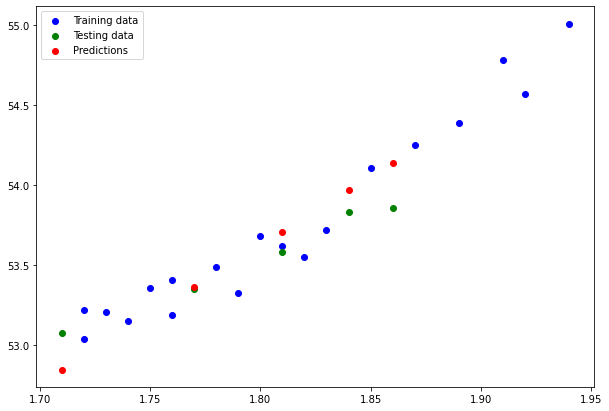

In [62]:
# Let's visualize model_1 by making a plot of its prediction
y6_pred = SkinData_model_6.predict(x1_test)
plot_predictions(predictions=y6_pred)

In [63]:
# model_6 evaluation metrics
mae_6 = mae(y1_test, y6_pred)
mse_6 = mse(y1_test, y6_pred)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=0.15950164>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.03379629>)

**Note on model_6:**

* Decreasing the learning rate led to a more inaccurate model, compared to model_5

* The addition of the activation function (both "relu" and None) led to an increase in loss.

### Comparing the model's results using a panda DataFrame

In [64]:
# Here we compare the results from our 6 models using a pandas DataFrame
import pandas as pd

model_results = [["SkinData_model_1", mae_1.numpy(), mse_1.numpy()],
                 ["SkinData_model_2", mae_2.numpy(), mse_2.numpy()],
                 ["SkinData_model_3", mae_3.numpy(), mse_3.numpy()],
                 ["SkinData_model_4", mae_4.numpy(), mse_4.numpy()],
                 ["SkinData_model_5", mae_5.numpy(), mse_5.numpy()],
                 ["SkinData_model_6", mae_6.numpy(), mse_6.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,SkinData_model_1,0.819793,0.916035
1,SkinData_model_2,3.349278,12.331079
2,SkinData_model_3,0.653543,0.577251
3,SkinData_model_4,0.296462,0.110431
4,SkinData_model_5,0.108396,0.024705
5,SkinData_model_6,0.159502,0.033796


In [65]:
# SkinData_model 5 is the most effective model as its mae and mse are the lowest

### **Let's train and test FatData**


### TEST model

* 1 layer, epochs = 100, SGD optimizer

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_test = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_test.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_test.fit(x2_train, y2_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 407ms/step - loss: 9.4550 - mae: 9.4550
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 5.4427 - mae: 5.4427
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 1.4304 - mae: 1.4304
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 2.5819 - mae: 2.5819
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 1.4304 - mae: 1.4304
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 2.5819 - mae: 2.5819
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 1.4304 - mae: 1.4304
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 2.5819 - mae: 2.5819
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.4304 - mae: 1.4304
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 2.5819 - mae: 2.5819
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 

In [67]:
# Check the results of the model on the test dataset
FatData_model_test.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 125ms/step - loss: 1.4349 - mae: 1.4349


[1.4349415302276611, 1.4349415302276611]

In [68]:
# Let's make predictions
y_pred = FatData_model_test.predict(x2_test)
y_pred

array([[3.332992 ],
       [3.451953 ],
       [3.2174304],
       [3.4740455],
       [3.348287 ]], dtype=float32)

In [69]:
# Let's create a plotting function
def plot_predictions(train_data = x2_train,
                     train_labels = y2_train,
                     test_data = x2_test,
                     test_labels = y2_test,
                     predictions = y_pred):

 # Let's plot the train and test data, and compare the predictions to the ground truth labels
 plt.figure(figsize=(10,7))
 # Plot training data in BLUE
 plt.scatter(train_data, train_labels, c ='b', label = 'Training data')
 # Plot testing data in GREEN
 plt.scatter(test_data, test_labels, c = "g", label = 'Testing data')
 # Plot model's predictions in RED
 plt.scatter(test_data, predictions, c = "r", label = 'Predictions') 
 # Show the legend
 plt.legend();

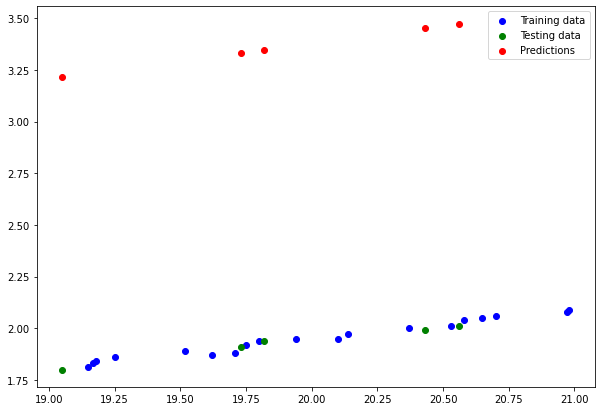

In [70]:
plot_predictions(train_data = x2_train,
                 train_labels = y2_train,
                 test_data = x2_test,
                 test_labels = y2_test,
                 predictions = y_pred)

In [71]:
# Let's calculate the MAE after matching the shape of y1_test to y_pred (squeeze)
mae = tf.metrics.mean_absolute_error(y_true = y2_test, 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.4349415>

In [72]:
# Let's calculate the MSE (for when larger errors are more significant than smaller errors)
mse = tf.metrics.mean_squared_error(y_true = y2_test, 
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.059605>

In [73]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y2_test, 
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y2_test, 
                                       y_pred = tf.squeeze(y_pred))

### **FatData_model_1**

* 2 layers, epochs = 100, SGD optimizer

In [74]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_1.fit(x2_train, y2_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 483ms/step - loss: 5.4822 - mae: 5.4822
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7328 - mae: 6.7328
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 4.8978 - mae: 4.8978
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 6.3574 - mae: 6.3574
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 4.3594 - mae: 4.3594
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.0116 - mae: 6.0116
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 3.8633 - mae: 3.8633
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5.6930 - mae: 5.6930
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 3.4062 - mae: 3.4062
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3994 - mae: 5.3994
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 2.9

In [75]:
# Check the results of the larger model on the test dataset
FatData_model_1.evaluate(x2_test, y2_test) 

1/1 [==============================] - 0s 200ms/step - loss: 0.6870 - mae: 0.6870


[0.6870183944702148, 0.6870183944702148]

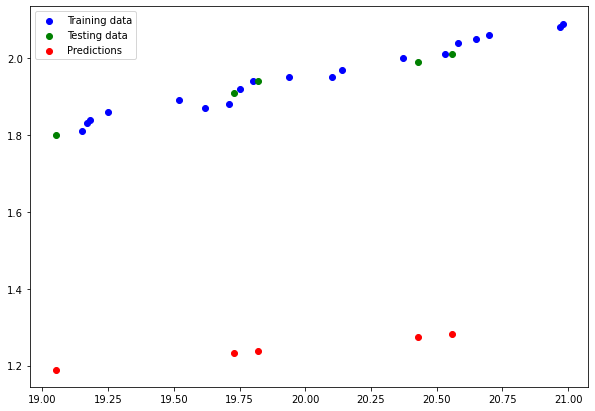

In [76]:
# Let's visualize model_1 by making a plot of its prediction
y1_pred = FatData_model_1.predict(x2_test)
plot_predictions(predictions = y1_pred)

In [77]:
# model_1 evaluation metrics
mae_1 = mae(y2_test, y1_pred)
mse_1 = mse(y2_test, y1_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.68701833>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.47373304>)

### FatData model_2

* 3 layers (extra 100 hidden units), epochs = 100, SGD optimizer

In [78]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_2.fit(x2_train, y2_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 468ms/step - loss: 8.0408 - mae: 8.0408
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 17.6328 - mae: 17.6328
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 4.1476 - mae: 4.1476
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0523 - mae: 12.0523
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 2.1311 - mae: 2.1311
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 8.9760 - mae: 8.9760
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.9451 - mae: 0.9451
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0866 - mae: 7.0866
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1880 - mae: 0.1880
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 5.8394 - mae: 5.8394
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss

In [79]:
# Check the results of the larger model on the test dataset
FatData_model_2.evaluate(x2_test, y2_test) 

1/1 [==============================] - 0s 163ms/step - loss: 0.4390 - mae: 0.4390


[0.4389835298061371, 0.4389835298061371]

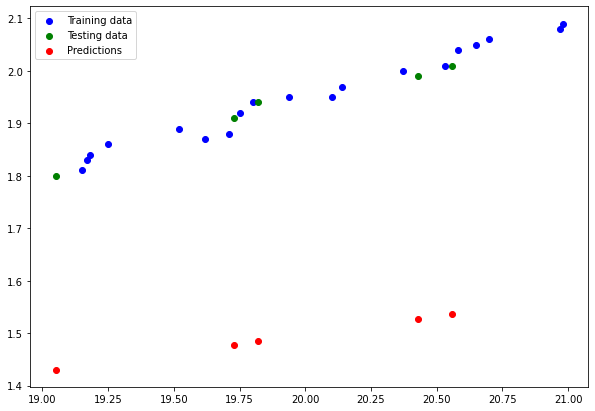

In [80]:
# Let's visualize model_2 by making a plot of its prediction
y2_pred = FatData_model_2.predict(x2_test)
plot_predictions(predictions = y2_pred)

In [81]:
# model_2 evaluation metrics
mae_2 = mae(y2_test, y2_pred)
mse_2 = mse(y2_test, y2_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.43898353>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.19410987>)

Text(0.5, 0, 'epochs')

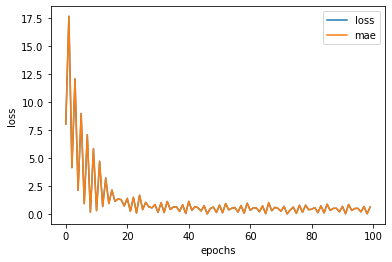

In [82]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### FatData model_3

* 2 layers, Adam optimizer (lr = 0.04), epochs = 500

In [83]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_3.fit(x2_train, y2_train, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 476ms/step - loss: 5.4822 - mae: 5.4822
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0320 - mae: 0.0320
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.1104 - mae: 1.1104
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4183 - mae: 0.4183
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1874 - mae: 0.1874
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7141 - mae: 0.7141
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2424 - mae: 0.2424
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1552 - mae: 1.1552
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3744 - mae: 1.3744
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7165 - mae: 0.7165
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6

In [84]:
# Let's check the results of the smaller model on the test dataset
FatData_model_3.evaluate(x2_test, y2_test) 

1/1 [==============================] - 0s 233ms/step - loss: 0.2009 - mae: 0.2009


[0.2008790224790573, 0.2008790224790573]

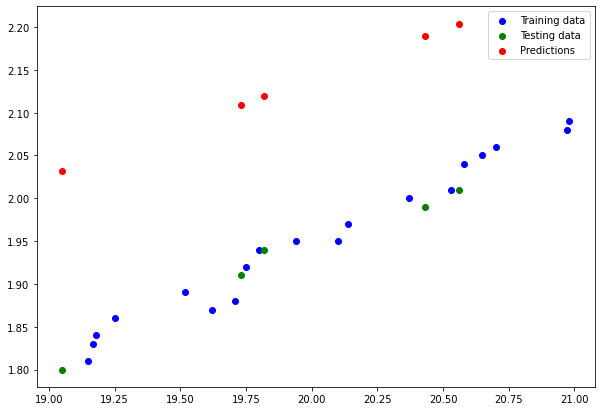

In [85]:
# Let's visualize model_1 by making a plot of its prediction
y3_pred = FatData_model_3.predict(x2_test)
plot_predictions(predictions = y3_pred)

Text(0.5, 0, 'epochs')

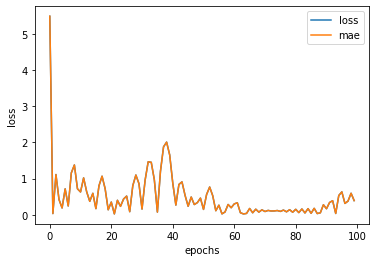

In [86]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [87]:
# model_3 evaluation metrics
mae_3 = mae(y2_test, y3_pred)
mse_3 = mse(y2_test, y3_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.20087902>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.040644508>)

### FatData model_4

* 2 layers, Adam optimizer (lr = 0.04), epochs = 600

In [88]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_4.fit(x2_train, y2_train, epochs = 600)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/600
1/1 [==============================] - 0s 489ms/step - loss: 5.4822 - mae: 5.4822
Epoch 2/600
1/1 [==============================] - 0s 7ms/step - loss: 0.0320 - mae: 0.0320
Epoch 3/600
1/1 [==============================] - 0s 11ms/step - loss: 1.1104 - mae: 1.1104
Epoch 4/600
1/1 [==============================] - 0s 7ms/step - loss: 0.4183 - mae: 0.4183
Epoch 5/600
1/1 [==============================] - 0s 4ms/step - loss: 0.1874 - mae: 0.1874
Epoch 6/600
1/1 [==============================] - 0s 14ms/step - loss: 0.7141 - mae: 0.7141
Epoch 7/600
1/1 [==============================] - 0s 7ms/step - loss: 0.2424 - mae: 0.2424
Epoch 8/600
1/1 [==============================] - 0s 6ms/step - loss: 1.1552 - mae: 1.1552
Epoch 9/600
1/1 [==============================] - 0s 11ms/step - loss: 1.3744 - mae: 1.3744
Epoch 10/600
1/1 [==============================] - 0s 12ms/step - loss: 0.7165 - mae: 0.7165
Epoch 11/600
1/1 [==============================] - 0s 8ms/step - loss: 0

In [89]:
# Let's check the results of the model on the test dataset
FatData_model_4.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 271ms/step - loss: 0.0337 - mae: 0.0337


[0.033722687512636185, 0.033722687512636185]

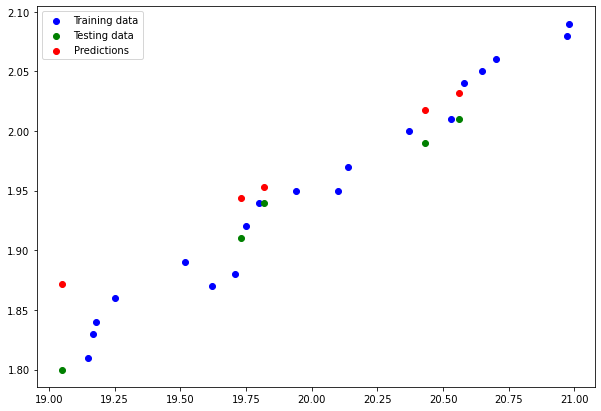

In [90]:
# Let's visualize model_1 by making a plot of its prediction
y4_pred = FatData_model_4.predict(x2_test)
plot_predictions(predictions = y4_pred)

In [91]:
# model_4 evaluation metrics
mae_4 = mae(y2_test, y4_pred)
mse_4 = mse(y2_test, y4_pred)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.033722617>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0015483636>)

Text(0.5, 0, 'epochs')

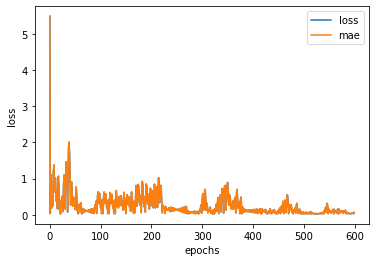

In [92]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### FatData model_5

* 2 layers, Adam optimizer (lr = 0.018), epochs = 2000, patience = 42

In [93]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_5 = tf.keras.Sequential([                                                                               
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = FatData_model_5.fit(x2_train, y2_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 509ms/step - loss: 5.4822 - mae: 5.4822
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 2.9701 - mae: 2.9701
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5135 - mae: 0.5135
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.8961 - mae: 1.8961
Epoch 5/2000
1/1 [==============================] - 0s 15ms/step - loss: 2.8996 - mae: 2.8996
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 3.0815 - mae: 3.0815
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.7299 - mae: 2.7299
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0057 - mae: 2.0057
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.0057 - mae: 1.0057
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.2092 - mae: 0.2092
Epoch 11/2000
1/1 [==============================] - 0s 5ms/step

In [94]:
# Let's check the results of the model on the test dataset
FatData_model_5.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 257ms/step - loss: 0.3209 - mae: 0.3209


[0.3208501935005188, 0.3208501935005188]

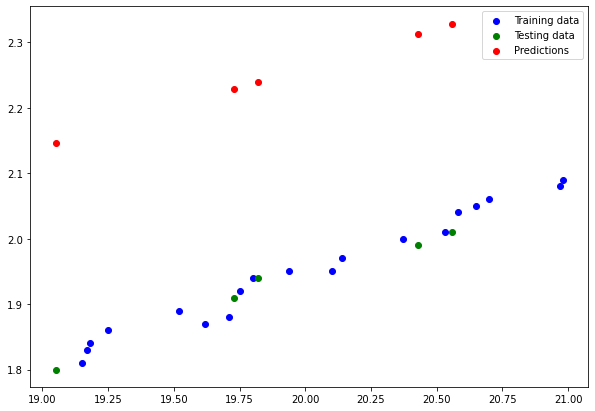

In [95]:
# Let's visualize model_1 by making a plot of its prediction
y5_pred = FatData_model_5.predict(x2_test)
plot_predictions(predictions = y5_pred)

In [96]:
# model_5 evaluation metrics
mae_5 = mae(y2_test, y5_pred)
mse_5 = mse(y2_test, y5_pred)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.3208501>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.10316589>)

Text(0.5, 0, 'epochs')

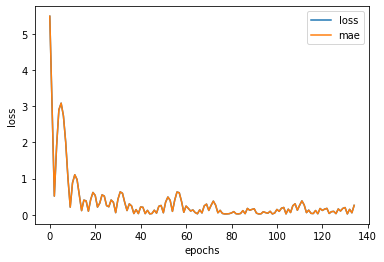

In [97]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### FatData model_6

* 2 layers, Adam optimizer (lr = 0.008), epochs = 2000, activation = "relu"


In [98]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_6 = tf.keras.Sequential([                                         
  tf.keras.layers.Dense(10, activation= "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = FatData_model_6.fit(x2_train, y2_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 0s 486ms/step - loss: 11.3002 - mae: 11.3002
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 10.7534 - mae: 10.7534
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 10.2176 - mae: 10.2176
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.6930 - mae: 9.6930
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 9.1799 - mae: 9.1799
Epoch 6/2000
1/1 [==============================] - 0s 15ms/step - loss: 8.6783 - mae: 8.6783
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 8.1884 - mae: 8.1884
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.7103 - mae: 7.7103
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.2441 - mae: 7.2441
Epoch 10/2000
1/1 [==============================] - 0s 16ms/step - loss: 6.7900 - mae: 6.7900
Epoch 11/2000
1/1 [==============================] - 0s 8

In [99]:
# Let's check the results of the model on the test dataset
FatData_model_6.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 145ms/step - loss: 0.0255 - mae: 0.0255


[0.02545192278921604, 0.02545192278921604]

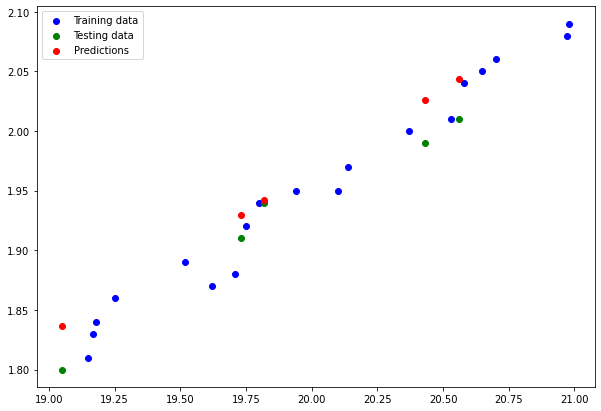

In [100]:
# Let's visualize model_1 by making a plot of its prediction
y6_pred = FatData_model_6.predict(x2_test)
plot_predictions(predictions = y6_pred)

In [101]:
# model_6 evaluation metrics
mae_6 = mae(y2_test, y6_pred)
mse_6 = mse(y2_test, y6_pred)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=0.025451923>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.00082254875>)

Text(0.5, 0, 'epochs')

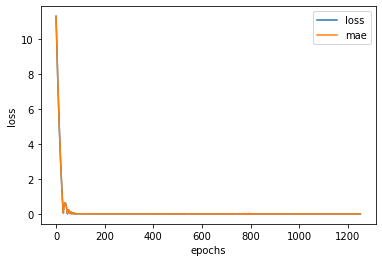

In [102]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Comparing the FatData model's result using a panda DataFrame


In [103]:
# Here we compare the results from our 6 models using a pandas DataFrame
import pandas as pd

model_results = [["FatData_model_1", mae_1.numpy(), mse_1.numpy()],
                 ["FatData_model_2", mae_2.numpy(), mse_2.numpy()],
                 ["FatData_model_3", mae_3.numpy(), mse_3.numpy()],
                 ["FatData_model_4", mae_4.numpy(), mse_4.numpy()],
                 ["FatData_model_5", mae_5.numpy(), mse_5.numpy()],
                 ["FatData_model_6", mae_6.numpy(), mse_6.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,FatData_model_1,0.687018,0.473733
1,FatData_model_2,0.438984,0.194110
2,FatData_model_3,0.200879,0.040645
3,FatData_model_4,0.033723,0.001548
4,FatData_model_5,0.320850,0.103166
5,FatData_model_6,0.025452,0.000823


In [104]:
# FatData_model_6 is the most effective model as its mae and mse are the lowest.

### TEST model for MuscleData

* 1 layer, epochs = 100, SGD optimizer

In [105]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_test = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_test.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_test.fit(x3_train, y3_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 377ms/step - loss: 17.0789 - mae: 17.0789
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 1.0832 - mae: 1.0832
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 14.9125 - mae: 14.9125
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0832 - mae: 1.0832
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 14.9125 - mae: 14.9125
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0832 - mae: 1.0832
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 14.9125 - mae: 14.9125
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0832 - mae: 1.0832
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.9125 - mae: 14.9125
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0832 - mae: 1.0832
Epoch 11/100
1/1 [==============================] - 0s 8ms/step -

In [106]:
# Checking the results of the model on the TEST dataset
MuscleData_model_test.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 126ms/step - loss: 14.8707 - mae: 14.8707


[14.87067699432373, 14.87067699432373]

In [107]:
# Let's make predictions
y_pred = MuscleData_model_test.predict(x3_test)
y_pred

array([[54.19172 ],
       [55.28748 ],
       [53.506866],
       [55.602512],
       [54.68481 ]], dtype=float32)

In [108]:
# Let's create a plotting function
def plot_predictions(train_data = x3_train,
                     train_labels = y3_train,
                     test_data = x3_test,
                     test_labels = y3_test,
                     predictions = y_pred):

 # Let's plot the train and test data, and compare the predictions to the ground truth labels
 plt.figure(figsize=(10,7))
 # Plot training data in BLUE
 plt.scatter(train_data, train_labels, c ='b', label = 'Training data')
 # Plot testing data in GREEN
 plt.scatter(test_data, test_labels, c = "g", label = 'Testing data')
 # Plot model's predictions in RED
 plt.scatter(test_data, predictions, c = "r", label = 'Predictions') 
 # Show the legend
 plt.legend();

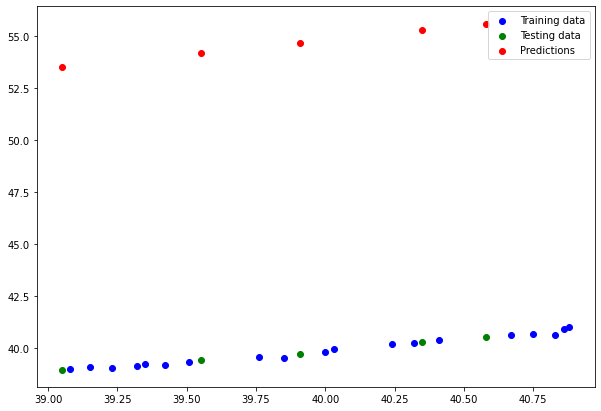

In [109]:
plot_predictions(train_data = x3_train,
                 train_labels = y3_train,
                 test_data = x3_test,
                 test_labels = y3_test,
                 predictions = y_pred)

In [110]:
# Let's calculate the MAE after matching the shape of y3_test to y_pred (squeeze)
mae = tf.metrics.mean_absolute_error(y_true = y3_test, 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.870677>

In [111]:
# Let's calculate the MSE (for when larger errors are more significant than smaller errors)
mse = tf.metrics.mean_squared_error(y_true = y3_test, 
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=221.17525>

In [112]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y3_test, 
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y3_test, 
                                       y_pred = tf.squeeze(y_pred))

### MuscleData_model_1

* 2 Layers, epochs = 100, SGD optimizer

In [113]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_1.fit(x3_train, y3_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 440ms/step - loss: 25.0186 - mae: 25.0186
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 27.2554 - mae: 27.2554
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 29.3901 - mae: 29.3901
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5012 - mae: 7.5012
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 32.4749 - mae: 32.4749
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.4388 - mae: 6.4388
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 32.4664 - mae: 32.4664
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 16.2759 - mae: 16.2759
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 11.1814 - mae: 11.1814
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 23.2177 - mae: 23.2177
Epoch 11/100
1/1 [==============================] - 0s 18

In [114]:
# Check the results of the model on the test dataset
MuscleData_model_1.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 224ms/step - loss: 8.6302 - mae: 8.6302


[8.630159378051758, 8.630159378051758]

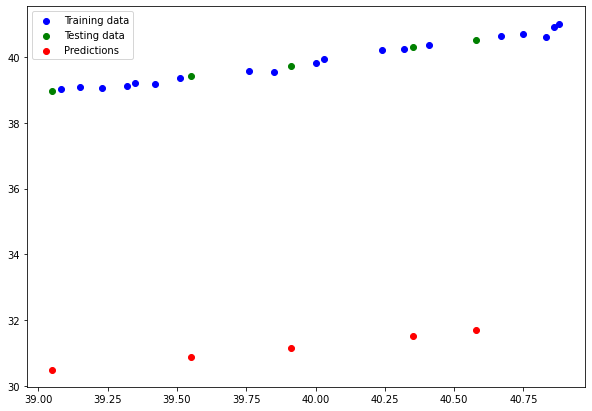

In [115]:
# Let's visualize model_1 by making a plot of its prediction
y1_pred = MuscleData_model_1.predict(x3_test)
plot_predictions(predictions = y1_pred)

Text(0.5, 0, 'epochs')

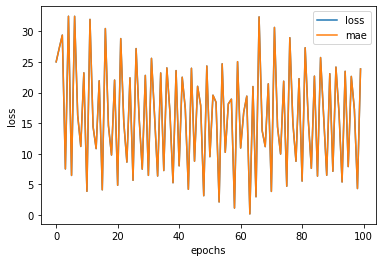

In [116]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [117]:
# model_2 evaluation metrics
mae_2 = mae(y3_test, y1_pred)
mse_2 = mse(y3_test, y1_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=8.630159>,
 <tf.Tensor: shape=(), dtype=float32, numpy=74.500656>)

### MuscleData_model_2

* 3 Layers (extra 100 hidden units), epochs = 100, SGD optimizer

In [118]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_2.fit(x3_train, y3_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 485ms/step - loss: 19.9052 - mae: 19.9052
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 110.4381 - mae: 110.4381
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 39.5277 - mae: 39.5277
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 33.0252 - mae: 33.0252
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 22.1370 - mae: 22.1370
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 6.2380 - mae: 6.2380
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 33.6609 - mae: 33.6609
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 25.9628 - mae: 25.9628
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.5654 - mae: 6.5654
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 52.4325 - mae: 52.4325
Epoch 11/100
1/1 [==============================] - 0s 7

In [119]:
# Let's check the results of the larger model on the test dataset
MuscleData_model_2.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 135ms/step - loss: 2.4394 - mae: 2.4394


[2.439401149749756, 2.439401149749756]

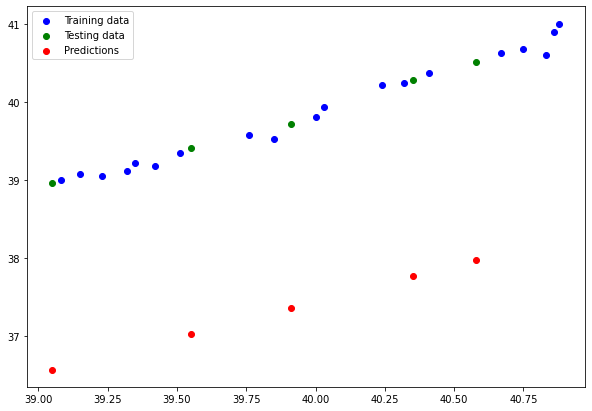

In [120]:
# Let's visualize model_2 by making a plot of its prediction
y2_pred = MuscleData_model_2.predict(x3_test)
plot_predictions(predictions = y2_pred)

Text(0.5, 0, 'epochs')

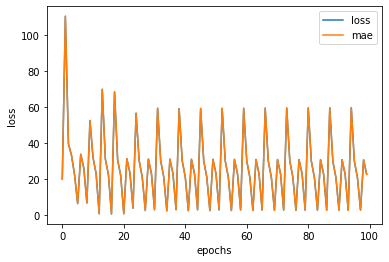

In [121]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [122]:
# model_2 evaluation metrics
mae_2 = mae(y3_test, y2_pred)
mse_2 = mse(y3_test, y2_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.4394004>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.956276>)

### MuscleData_model_3

* 2 Layers, Adam optimizer (lr = 0.04), epochs = 500

In [123]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_3.fit(x3_train, y3_train, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 487ms/step - loss: 25.0186 - mae: 25.0186
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6603 - mae: 13.6603
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7955 - mae: 1.7955
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6209 - mae: 10.6209
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 15.2096 - mae: 15.2096
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 15.1834 - mae: 15.1834
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3434 - mae: 12.3434
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7651 - mae: 7.7651
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 2.1302 - mae: 2.1302
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 4.1122 - mae: 4.1122
Epoch 11/100
1/1 [==============================] - 0s 7ms/ste

In [124]:
# Let's check the results of the smaller model on the test dataset
MuscleData_model_3.evaluate(x3_test, y3_test) 

1/1 [==============================] - 0s 329ms/step - loss: 0.4241 - mae: 0.4241


[0.4241188168525696, 0.4241188168525696]

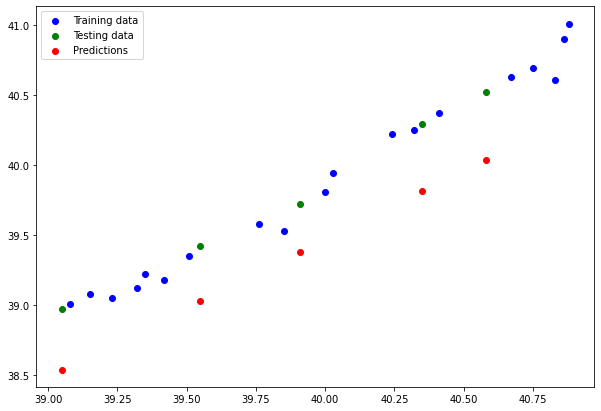

In [125]:
# Let's visualize model_3 by making a plot of its prediction
y3_pred = MuscleData_model_3.predict(x3_test)
plot_predictions(predictions = y3_pred)

Text(0.5, 0, 'epochs')

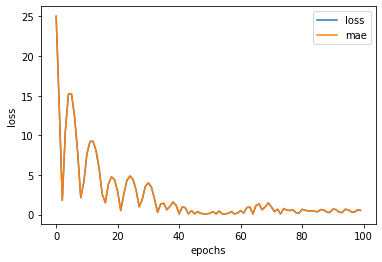

In [126]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [127]:
# model_3 evaluation metrics
mae_3 = mae(y3_test, y3_pred)
mse_3 = mse(y3_test, y3_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.42411956>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.18287471>)

### MuscleData_model_4

* 2 Layers, Adam optimizer (lr = 0.04), epochs = 600

In [128]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_4.fit(x3_train, y3_train, epochs = 600)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/600
1/1 [==============================] - 0s 493ms/step - loss: 25.0186 - mae: 25.0186
Epoch 2/600
1/1 [==============================] - 0s 4ms/step - loss: 13.6603 - mae: 13.6603
Epoch 3/600
1/1 [==============================] - 0s 14ms/step - loss: 1.7955 - mae: 1.7955
Epoch 4/600
1/1 [==============================] - 0s 7ms/step - loss: 10.6209 - mae: 10.6209
Epoch 5/600
1/1 [==============================] - 0s 9ms/step - loss: 15.2096 - mae: 15.2096
Epoch 6/600
1/1 [==============================] - 0s 8ms/step - loss: 15.1834 - mae: 15.1834
Epoch 7/600
1/1 [==============================] - 0s 5ms/step - loss: 12.3434 - mae: 12.3434
Epoch 8/600
1/1 [==============================] - 0s 19ms/step - loss: 7.7651 - mae: 7.7651
Epoch 9/600
1/1 [==============================] - 0s 6ms/step - loss: 2.1302 - mae: 2.1302
Epoch 10/600
1/1 [==============================] - 0s 8ms/step - loss: 4.1122 - mae: 4.1122
Epoch 11/600
1/1 [==============================] - 0s 6ms/step

In [129]:
# Let's check the results of the model on the test dataset
MuscleData_model_4.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 310ms/step - loss: 0.4026 - mae: 0.4026


[0.402618408203125, 0.402618408203125]

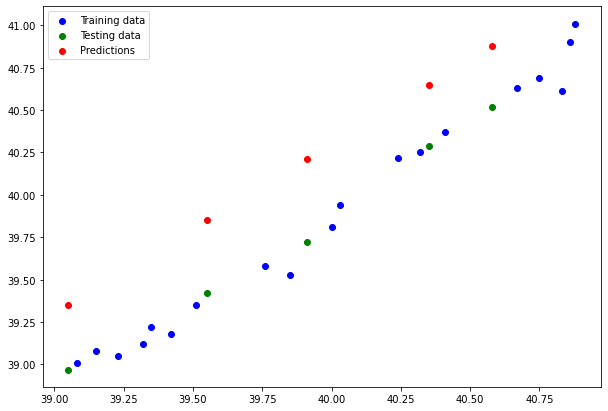

In [130]:
# Let's visualize model_4 by making a plot of its prediction
y4_pred = MuscleData_model_4.predict(x3_test)
plot_predictions(predictions = y4_pred)

Text(0.5, 0, 'epochs')

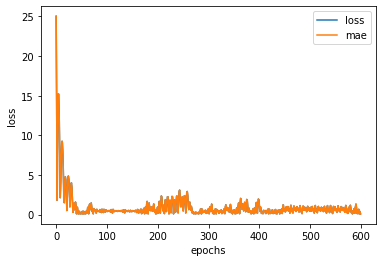

In [131]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [132]:
# model_4 evaluation metrics
mae_4 = mae(y3_test, y4_pred)
mse_4 = mse(y3_test, y4_pred)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.4026169>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.16466658>)

### MuscleData_model_5

* 2 Layers, Adam Optimizer (lr = 0.018), epochs = 2000, patience = 42

In [133]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_5 = tf.keras.Sequential([                                                                               
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = MuscleData_model_5.fit(x3_train, y3_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 530ms/step - loss: 25.0186 - mae: 25.0186
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 19.9723 - mae: 19.9723
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 14.8203 - mae: 14.8203
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.5605 - mae: 9.5605
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.1887 - mae: 4.1887
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.3026 - mae: 1.3026
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 4.3380 - mae: 4.3380
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 5.6170 - mae: 5.6170
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.6161 - mae: 5.6161
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.6682 - mae: 4.6682
Epoch 11/2000
1/1 [==============================] - 0s 12m

In [134]:
# Let's check the results of the model on the test dataset
MuscleData_model_5.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 131ms/step - loss: 0.4768 - mae: 0.4768


[0.476797491312027, 0.476797491312027]

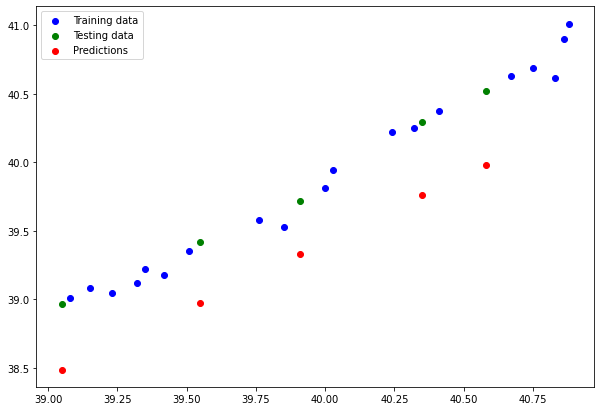

In [135]:
# Let's visualize model_1 by making a plot of its prediction
y5_pred = MuscleData_model_5.predict(x3_test)
plot_predictions(predictions = y5_pred)

Text(0.5, 0, 'epochs')

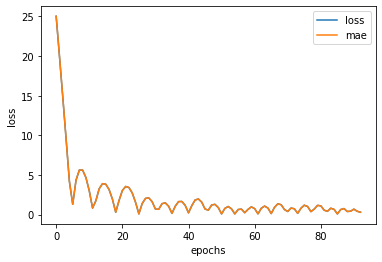

In [136]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [137]:
# model_5 evaluation metrics
mae_5 = mae(y3_test, y5_pred)
mse_5 = mse(y3_test, y5_pred)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.476799>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.2303952>)

### MuscleData_model_6

* 2 Layers, Adam optimizer (lr = 0.008), epochs = 2000, activation = "relu"

In [138]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_6 = tf.keras.Sequential([                                         
  tf.keras.layers.Dense(10, activation= "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = MuscleData_model_6.fit(x3_train, y3_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 588ms/step - loss: 13.3911 - mae: 13.3911
Epoch 2/2000
1/1 [==============================] - 0s 16ms/step - loss: 12.3000 - mae: 12.3000
Epoch 3/2000
1/1 [==============================] - 0s 15ms/step - loss: 11.1875 - mae: 11.1875
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 10.0530 - mae: 10.0530
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 8.8964 - mae: 8.8964
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 7.7171 - mae: 7.7171
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 6.5148 - mae: 6.5148
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 5.2890 - mae: 5.2890
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 4.0394 - mae: 4.0394
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 2.7655 - mae: 2.7655
Epoch 11/2000
1/1 [==============================] -

In [139]:
# Let's check the results of the model on the test dataset
MuscleData_model_6.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 174ms/step - loss: 0.0446 - mae: 0.0446


[0.04458160325884819, 0.04458160325884819]

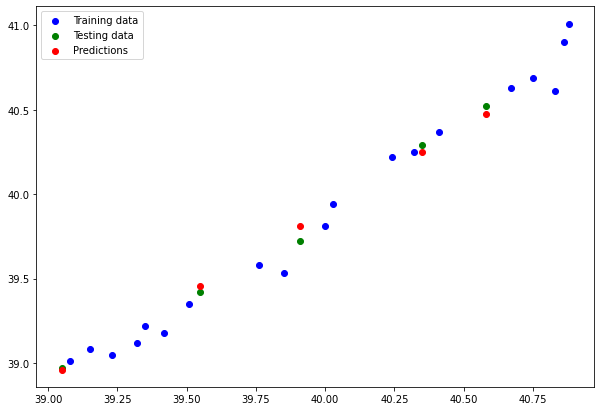

In [140]:
# Let's visualize model_1 by making a plot of its prediction
y6_pred = MuscleData_model_6.predict(x3_test)
plot_predictions(predictions = y6_pred)

Text(0.5, 0, 'epochs')

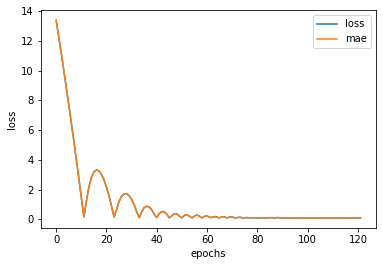

In [141]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [142]:
# model_6 evaluation metrics
mae_6 = mae(y3_test, y6_pred)
mse_6 = mse(y3_test, y6_pred)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=0.044581603>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0027293928>)

### Let's compare the MuscleData model's result using a panda DataFrame

In [143]:
# Here we compare the results from our 6 models using a pandas DataFrame
import pandas as pd

model_results = [["MuscleData_model_1", mae_1.numpy(), mse_1.numpy()],
                 ["MuscleData_model_2", mae_2.numpy(), mse_2.numpy()],
                 ["MuscleData_model_3", mae_3.numpy(), mse_3.numpy()],
                 ["MuscleData_model_4", mae_4.numpy(), mse_4.numpy()],
                 ["MuscleData_model_5", mae_5.numpy(), mse_5.numpy()],
                 ["MuscleData_model_6", mae_6.numpy(), mse_6.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,MuscleData_model_1,0.687018,0.473733
1,MuscleData_model_2,2.439400,5.956276
2,MuscleData_model_3,0.424120,0.182875
3,MuscleData_model_4,0.402617,0.164667
4,MuscleData_model_5,0.476799,0.230395
5,MuscleData_model_6,0.044582,0.002729


In [144]:
# MuscleData_model_6 is the most effective model as its mae and mse are the lowest.

### **Preprocessing data (normalization and standardization)**



* The histogram plots below show that each of the features are on different SCALES. This is where we need normalization.

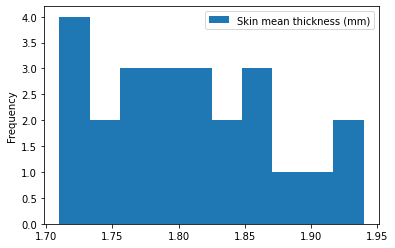

In [145]:
x1.plot(kind = "hist")

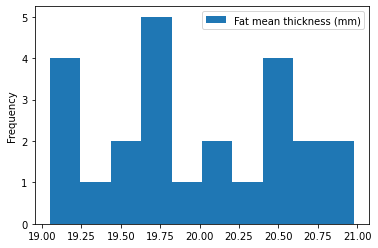

In [146]:
x2.plot(kind = "hist")

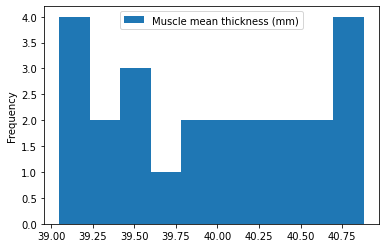

In [147]:
x3.plot(kind = "hist")

## The data is re-created a 2nd time to create a new subset for the normalized data.

In [148]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset dataframe
SkinData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Skin')
FatData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Subcutaneous fat')
MuscleData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Muscle')

### To prepare our data, we borrow a few classes from Scikit-Learn

**Normalizing SkinData**

In [149]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Here we create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Skin mean thickness (mm)"]), # turn all values in these columns between 0 and 1
)

# Here we create the x & y variables for SkinData
x1 = SkinData.drop("Skin cutting force (N)", axis = 1)
y1 = SkinData["Skin cutting force (N)"]

# Here we build our train and test sets for SkinData
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

# Here we fit the column transformer to our training data
ct.fit(x1_train)

# Transform training and test data with normization (MinMaxScaler)
x1_train_normal = ct.transform(x1_train)
x1_test_normal = ct.transform(x1_test)

**Normalizing FatData**

In [150]:
# Here we create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Fat mean thickness (mm)"]), # turn all values in these columns between 0 and 1
)

# Here we create the x & y variables for SkinData
x1 = FatData.drop("Subcutaneous fat cutting force (N)", axis = 1)
y1 = FatData["Subcutaneous fat cutting force (N)"]

# Here, for FatData, we create the training and test sets with a 80:20 split.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

# Here we fit the column transformer to our training data
ct.fit(x2_train)

# Transform training and test data with normization (MinMaxScaler)
x2_train_normal = ct.transform(x2_train)
x2_test_normal = ct.transform(x2_test)

**Normalizing MuscleData**

In [151]:
# Here we create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Muscle mean thickness (mm)"]), # turn all values in these columns between 0 and 1
)

# Here we create the x & y variables for SkinData
x1 = MuscleData.drop("Muscle cutting force (N)", axis = 1)
y1 = MuscleData["Muscle cutting force (N)"]

# Here, for MuscleData, we create the training and test sets with a 80:20 split.
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 42)

# Here we fit the column transformer to our training data
ct.fit(x3_train)

# Transform training and test data with normization (MinMaxScaler)
x3_train_normal = ct.transform(x3_train)
x3_test_normal = ct.transform(x3_test)

Our data has been **normalized** so now we can build a neural network model to fit our normalized dataset.

### Neural network model with normalized dataset

Normalized Skin data

In [152]:
# Let's test the normalized dataset with the settings of SkinData_model_5

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
Model_1_Skin = tf.keras.Sequential([                                                                                                               
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
Model_1_Skin.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = Model_1_Skin.fit(x1_train_normal, y1_train, epochs = 2000, callbacks = [callback]) # What's changed: x1_train_NORMAL

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 581ms/step - loss: 53.5891 - mae: 53.5891
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 53.4552 - mae: 53.4552
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 53.3178 - mae: 53.3178
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 53.1768 - mae: 53.1768
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 53.0319 - mae: 53.0319
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 52.8827 - mae: 52.8827
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 52.7283 - mae: 52.7283
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 52.5679 - mae: 52.5679
Epoch 9/2000
1/1 [==============================] - 0s 15ms/step - loss: 52.4005 - mae: 52.4005
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 52.2254 - mae: 52.2254
Epoch 11/2000
1/1 [===========================

In [153]:
# Let's check the results of the model on the test dataset
Model_1_Skin.evaluate(x1_test_normal, y1_test) # What's changed: x1_test_NORMAL

1/1 [==============================] - 0s 327ms/step - loss: 0.1586 - mae: 0.1586


[0.1586158722639084, 0.1586158722639084]

In [154]:
# Without normalized data: SkinData_model_5
# loss: 0.1206 - mae: 0.1206

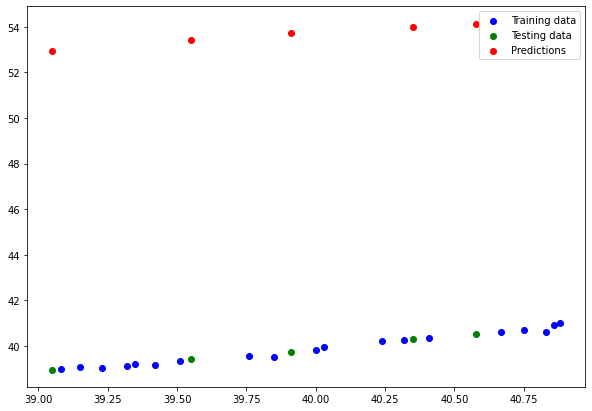

In [155]:
# Let's visualize model_1 by making a plot of its prediction
pred_y1 = Model_1_Skin.predict(x1_test_normal)
plot_predictions(predictions = pred_y1)

In [156]:
# The prediction graph doesn't seem to correlate with the dispalyed loss of the normalized data.

Note on NORMALIZED model:

* The model was less effective when normalized, with a loss of 0.1362 (comapred to 0.0846).

* The normalized model reached a low loss with an epoch = 325, compared to SkinData_model_5 (epoch = 1516)

Normalized Fat data

In [157]:
# Let's test the normalized dataset with the settings of FatData_model_6

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
Model_1_Fat = tf.keras.Sequential([                                                                                                               
  tf.keras.layers.Dense(10, activation = "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
Model_1_Fat.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = Model_1_Fat.fit(x2_train_normal, y2_train, epochs = 2000, callbacks = [callback]) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 516ms/step - loss: 1.6398 - mae: 1.6398
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.6039 - mae: 1.6039
Epoch 3/2000
1/1 [==============================] - 0s 14ms/step - loss: 1.5673 - mae: 1.5673
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.5299 - mae: 1.5299
Epoch 5/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.4917 - mae: 1.4917
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.4527 - mae: 1.4527
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.4129 - mae: 1.4129
Epoch 8/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.3722 - mae: 1.3722
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.3307 - mae: 1.3307
Epoch 10/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.2883 - mae: 1.2883
Epoch 11/2000
1/1 [==============================] - 0s 5ms/

In [158]:
# Let's check the results of the model on the test dataset
Model_1_Fat.evaluate(x2_test_normal, y2_test) 

1/1 [==============================] - 0s 144ms/step - loss: 0.0189 - mae: 0.0189


[0.018915344029664993, 0.018915344029664993]

In [159]:
# Without normalized data: FatData_model_6
# loss: 0.0120 - mae: 0.0120

In [160]:
tf.constant(pred_y1)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[53.426453],
       [53.97938 ],
       [52.95251 ],
       [54.13736 ],
       [53.74241 ]], dtype=float32)>

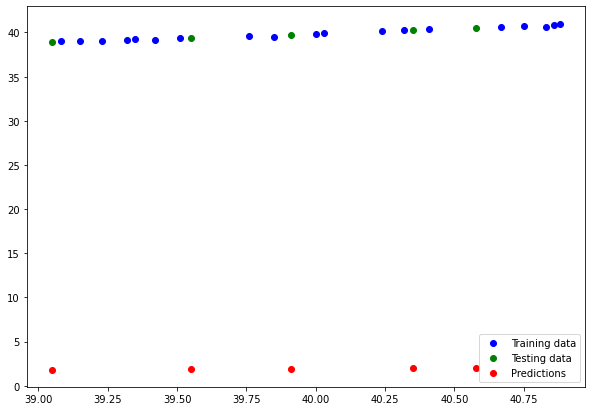

In [161]:
# Let's visualize model_6 by making a plot of its prediction
pred_y1 = Model_1_Fat.predict(x2_test_normal) 
plot_predictions(predictions = pred_y1)

In [162]:
# The prediction graph doesn't seem to correlate with the dispalyed loss of the normalized data.

Note on NORMALIZED model:

* The model was less effective when normalized, with a loss of 0.0216 (comapred to 0.0168).

* The normalized model reached a low loss with an epoch = 239, compared to FatData_model_6 (epoch = 105)

Normalized Muscle Data

In [163]:
# Let's test the normalized dataset with the settings of FatData_model_6

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
Model_1_Muscle = tf.keras.Sequential([                                                                                                               
  tf.keras.layers.Dense(10, activation = "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
Model_1_Muscle.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = Model_1_Muscle.fit(x3_train_normal, y3_train, epochs = 2000, callbacks = [callback]) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 526ms/step - loss: 39.5391 - mae: 39.5391
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 39.5024 - mae: 39.5024
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 39.4649 - mae: 39.4649
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 39.4266 - mae: 39.4266
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 39.3874 - mae: 39.3874
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.3474 - mae: 39.3474
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 39.3066 - mae: 39.3066
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 39.2649 - mae: 39.2649
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 39.2224 - mae: 39.2224
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 39.1789 - mae: 39.1789
Epoch 11/2000
1/1 [==========================

In [164]:
# Let's check the results of the model on the test dataset
Model_1_Muscle.evaluate(x3_test_normal, y3_test)

1/1 [==============================] - 0s 359ms/step - loss: 0.0477 - mae: 0.0477


[0.04773712158203125, 0.04773712158203125]

In [165]:
# Without normalized data: MuscleData_model_6
# loss: 0.0446 - mae: 0.0446

In [166]:
tf.constant(pred_y1)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.9143732],
       [2.0116045],
       [1.8358113],
       [2.029662 ],
       [1.9268743]], dtype=float32)>

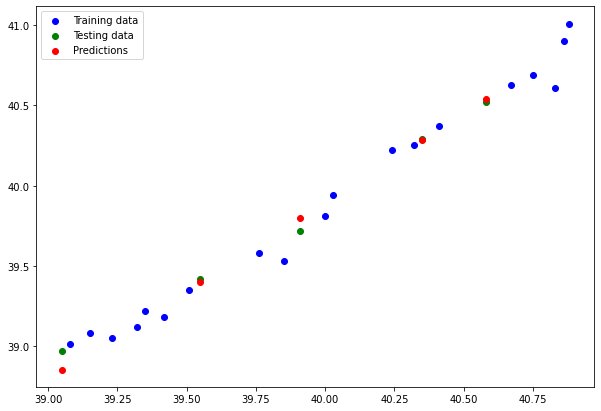

In [167]:
# Let's visualize model_6 by making a plot of its prediction
pred_y1 = Model_1_Muscle.predict(x3_test_normal) 
plot_predictions(predictions = pred_y1)

Note on NORMALIZED model:

* The normalized models were slightly less effective at predicting the force. However, the normalized data reached a similar loss with fewer epochs

### Let's test the trained models on the unlabelled data

In [168]:
# Upload dataset from excel
from google.colab import files
uploaded = files.upload()

Saving UL.xlsx to UL.xlsx


In [182]:
# Read the dataset for the tissue thickness in the thigh region
SkinUL_Data = pd.read_excel('/content/UL.xlsx', sheet_name = 'SkinUL')
FatUL_Data = pd.read_excel('/content/UL.xlsx', sheet_name = 'FatUL')
MuscleUL_Data = pd.read_excel('//content/UL.xlsx', sheet_name = 'MuscleUL')

# Read the dataset for the tissue thickness in the rest of the body
SkinUL_Data2 = pd.read_excel('/content/UL.xlsx', sheet_name = 'Skin')
FatUL_Data2 = pd.read_excel('/content/UL.xlsx', sheet_name = 'Fat')
MuscleUL_Data2 = pd.read_excel('/content/UL.xlsx', sheet_name = 'Muscle')

### Testing the unlabelled Skin thickness data to predict the output cutting force.

In [183]:
y_prediction1 = SkinData_model_5.predict(SkinUL_Data)
y_prediction1

array([[54.02341 ],
       [49.05632 ],
       [50.91901 ],
       [48.124985],
       [55.575714],
       [54.1787  ],
       [52.00557 ],
       [48.9011  ],
       [51.603333],
       [52.471184],
       [55.871975],
       [50.453335],
       [51.850353],
       [50.453335],
       [53.253357],
       [50.91901 ],
       [53.94586 ],
       [53.94586 ],
       [50.453335],
       [47.193645],
       [50.763775],
       [50.76373 ],
       [50.763775],
       [55.886154],
       [51.927956],
       [54.333904],
       [47.18205 ],
       [52.93691 ],
       [54.178688],
       [49.677174],
       [51.850353],
       [53.480198],
       [56.739872],
       [52.78168 ],
       [51.617455],
       [53.945797],
       [53.557796],
       [51.617504],
       [52.00557 ],
       [49.05632 ],
       [48.9011  ],
       [51.229454],
       [52.471233],
       [48.74587 ],
       [52.93691 ],
       [49.910046],
       [50.763775],
       [49.987667],
       [50.453335],
       [48.9011  ],


In [184]:
y_prediction2 = FatData_model_6.predict(FatUL_Data)
y_prediction2

array([[ 1.01187634e+00],
       [ 8.57784867e-01],
       [ 5.52201629e-01],
       [ 8.34279776e-01],
       [ 2.38781482e-01],
       [-1.92253605e-01],
       [ 4.45677936e-02],
       [ 2.77958542e-01],
       [ 5.29751182e-03],
       [ 1.37230814e+00],
       [ 1.08786464e+00],
       [ 3.69372636e-01],
       [ 1.13413364e-01],
       [ 1.60059333e-03],
       [ 3.16924214e+00],
       [ 5.05188584e-01],
       [ 2.12321901e+00],
       [ 2.21804231e-01],
       [-3.52266341e-01],
       [ 1.36919945e-01],
       [ 8.29054832e-01],
       [ 1.50551105e+00],
       [ 9.15245175e-01],
       [ 3.95491034e-01],
       [ 1.61391139e+00],
       [ 2.64898568e-01],
       [ 6.54258251e-01],
       [ 1.35925770e+00],
       [ 1.81351602e-02],
       [ 1.03015924e+00],
       [ 7.71595597e-01],
       [ 9.47894454e-01],
       [ 1.68261141e-01],
       [ 6.17496848e-01],
       [ 1.27697659e+00],
       [ 1.82545924e+00],
       [ 5.59526682e-02],
       [ 1.96991354e-01],
       [ 7.1

In [185]:
y_prediction3 = MuscleData_model_6.predict(MuscleUL_Data)
y_prediction3

array([[33.3821  ],
       [27.741108],
       [34.98323 ],
       [29.558718],
       [33.28807 ],
       [23.173615],
       [26.375574],
       [26.281395],
       [35.614178],
       [38.863094],
       [27.53392 ],
       [27.317327],
       [33.853123],
       [27.968922],
       [33.438602],
       [33.853123],
       [27.100727],
       [38.24169 ],
       [30.613474],
       [25.631598],
       [30.020155],
       [33.513943],
       [28.051888],
       [29.106663],
       [31.50814 ],
       [22.891064],
       [20.037567],
       [26.611015],
       [33.43033 ],
       [41.5565  ],
       [31.027857],
       [17.83386 ],
       [33.956688],
       [24.021187],
       [41.11388 ],
       [39.136204],
       [28.447433],
       [31.470457],
       [30.42512 ],
       [33.542316],
       [43.506107],
       [26.752274],
       [29.709373],
       [21.8363  ],
       [16.327047],
       [34.578247],
       [20.075224],
       [25.970629],
       [30.613474],
       [33.438736],


In [186]:
y_prediction4 = SkinData_model_5.predict(SkinUL_Data2)
y_prediction4

array([[52.31602 ],
       [46.184685],
       [48.513027],
       [46.57274 ],
       [53.026096],
       [47.73691 ],
       [55.265247],
       [46.960804],
       [46.960796],
       [48.435425],
       [48.59065 ],
       [48.590656],
       [47.659317],
       [54.1787  ],
       [53.169724],
       [49.987656],
       [47.078735],
       [46.08995 ],
       [52.31602 ],
       [52.78169 ],
       [52.781666],
       [52.165936],
       [47.814533],
       [53.07501 ],
       [53.945835],
       [50.065258],
       [53.24736 ],
       [53.169724],
       [56.507053],
       [52.39361 ],
       [52.31602 ],
       [49.056328],
       [50.45334 ],
       [49.133934],
       [47.974903],
       [46.032494],
       [45.0102  ],
       [49.048595],
       [51.11454 ],
       [49.289143],
       [51.850334],
       [49.521996],
       [49.289143],
       [48.513027],
       [49.05632 ],
       [46.759727],
       [54.75341 ],
       [50.45332 ],
       [46.57274 ],
       [46.883186],


In [187]:
y_prediction5 = FatData_model_6.predict(FatUL_Data2)
y_prediction5

array([[-2.05410376e-01],
       [-3.39832366e-01],
       [-2.51459718e-01],
       [-3.40030730e-01],
       [-4.02973861e-01],
       [-7.38427341e-02],
       [-3.81632268e-01],
       [-1.85676053e-01],
       [-2.90929705e-01],
       [ 3.53701442e-01],
       [-2.12168396e-02],
       [-3.12857598e-01],
       [-3.08472037e-01],
       [ 1.34307474e-01],
       [ 6.09660983e-01],
       [ 5.09777665e-03],
       [ 5.11464477e-02],
       [-1.33048147e-01],
       [-2.66987979e-02],
       [-3.30731452e-01],
       [-4.02973861e-01],
       [ 5.91379166e-01],
       [-1.06734663e-01],
       [ 1.21248871e-01],
       [ 5.59515655e-02],
       [-3.71843666e-01],
       [-3.26014370e-01],
       [ 2.93760091e-01],
       [-3.43724191e-02],
       [ 3.69371086e-01],
       [-2.07603961e-01],
       [ 1.93072706e-01],
       [ 2.15274960e-01],
       [ 1.71569884e-02],
       [ 1.00665879e+00],
       [ 7.01076150e-01],
       [-3.76738012e-01],
       [-3.37583333e-01],
       [-7.8

In [188]:
y_prediction6 = MuscleData_model_6.predict(MuscleUL_Data2)
y_prediction6

array([[16.958027 ],
       [11.0211315],
       [15.168665 ],
       [12.107965 ],
       [12.9555435],
       [16.788511 ],
       [12.0797205],
       [ 8.858914 ],
       [ 8.764744 ],
       [13.671291 ],
       [ 8.058423 ],
       [10.723594 ],
       [ 9.216786 ],
       [22.175339 ],
       [13.143908 ],
       [13.454697 ],
       [16.166952 ],
       [12.494106 ],
       [ 9.32979  ],
       [ 8.237361 ],
       [10.685924 ],
       [13.228675 ],
       [14.13276  ],
       [11.59002  ],
       [10.742422 ],
       [10.196211 ],
       [11.703018 ],
       [15.149857 ],
       [14.980341 ],
       [10.271544 ],
       [ 6.834142 ],
       [ 8.152597 ],
       [14.697813 ],
       [11.495825 ],
       [15.131006 ],
       [10.968462 ],
       [16.392944 ],
       [15.432384 ],
       [19.783295 ],
       [16.336468 ],
       [19.802116 ],
       [10.930773 ],
       [13.944386 ],
       [29.370335 ],
       [19.500748 ],
       [16.279964 ],
       [ 8.01134  ],
       [10.22

In [189]:
import numpy as np
np.savetxt('export.csv', y_prediction1, delimiter = ',')

In [190]:
import numpy as np
np.savetxt('export2.csv', y_prediction2, delimiter = ',')

In [191]:
import numpy as np
np.savetxt('export3.csv', y_prediction3, delimiter = ',')

In [192]:
import numpy as np
np.savetxt('export4.csv', y_prediction4, delimiter = ',')

In [193]:
import numpy as np
np.savetxt('export5.csv', y_prediction5, delimiter = ',')

In [194]:
import numpy as np
np.savetxt('export6.csv', y_prediction6, delimiter = ',')